## **Clasificacion: Churn Model**


 ##### Docente: Jorge Brian Alarcon Flores

#**Predicción del Churn**

**ANÁLISIS DE CHURN DE CLIENTES PARA UNA EMPRESA DE TELECOMUNICACIONES**


In [ ]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importamos la data
url = 'https://raw.githubusercontent.com/JBrianAlicorp/Business-Analytics/master/Data_Customer_Churn.csv'
data = pd.read_csv(url,encoding='latin1')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Desarrollar un modelo predictivo para detectar la fuga de clientes de una empresa de telecomunicaciones

# y (variable dependiente) : Churn
# Xs (variables independientes) : Todas menos el Churn, CustomerID

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.duplicated().sum() #data.drop_duplicated() esta funcion elimina las filas duplicadas de mi dataset

0

**Análisis descriptivo de Churn**


In [ ]:
data["Churn"].value_counts(normalize = True) * 100# Diferencia de 66.66666% y 33.333333%

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

El 26.5% de mis clientes dejaron de serlo.

In [ ]:
# Modelos de Clasificación

# 1. Limpieza de tu data
# 2. Analisis Descriptivo
# 3. Organizar tu data a formato numerico (variables cualitativas --> numericas (formato))
# 4. Particion de la data (train y test)
# 5. Ejecucion de modelos
# 6. Balanceo de datos
# 7. Optimizacion de hiperparametros

**Limpieza de data**


In [ ]:
# Tenemos valores en nuestra tabla que son espacios en blanco no necesariamente son valores nulos (TIP OPCIONAL)

data = data.replace(" ",np.nan) # replace("El dato que quieres reemplazar","El dato por el cual lo quieres reemplazar")
data.dropna(inplace = True); # identique a todos los valores nulos "NaN", lo puedo eliminar con la funcion dropna()

In [ ]:
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Preprocesamiento de datos**

In [ ]:
# Guardar todas las variables categoricas en un solo lugar

cat_cols = data[['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']]

In [ ]:
cat_cols

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [ ]:
num_cols = data[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [ ]:
num_cols

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [ ]:
# Generar variables para las dos columnas que omiti de mi mapeo de variables cualitativas y cuantitativas

id_customer = data["customerID"]
label = data["Churn"]

In [ ]:
# Transformacion de variables categoricas a numericas

# Label encoding (Target Encoding) : Cambiar en la misma columna el valor categorico a numerico

# Nivel_Instruccion
# -----------------
# Superior  --> 3
# Secundaria -> 2
# Tecnico. ---> 1
# Superior ---> 3
# Tecnico. ---> 1


# One hot encoding : Genera nuevas columnas dicotomicas a partir de las categorias de las variables categoricas

In [ ]:
label.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
# La variable target categorica solo puede ser transformada con el target encoding

label = label.apply(lambda x: 1 if x == "Yes" else 0) # Yes - 1, No -0

In [ ]:
# Cuando el # de categorias es muy grande:

# 1. Analizar la distribucion % de las categorias de dicha variable
# 2. Identificar a las categorias con % menor o igual a 5%
# 3. Agrupar las categorias con % menor o igual a 5% en una nueva categoria "Otros"

# Ventas 50% TI 20% DS 15% Ing. 4% Marketing 4% RRHH 4% Agilidad 3%
# Ventas 50% TI 20% DS 15% Otros 15%

In [ ]:
label.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
data["SeniorCitizen"] = data["SeniorCitizen"].astype("str")

<ipython-input-21-8f67e6261d75>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

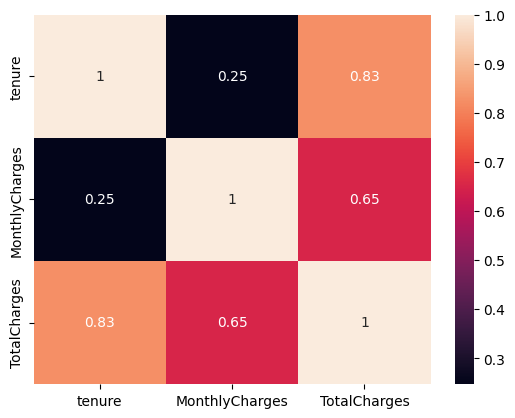

In [ ]:
# La matriz de correlacion considera el coeficiente de correlacion de Pearson
# El coeficiente de correlacion de pearson se analiza SOLO para verificar la RELACION LINEAL entre VARIABLES CUANTITATIVAS
# Si la variable tiene formato numerico pero ORIGINALMENTE es una variable CATEGORICA no aplica para la matriz de correlacion

sns.heatmap(data.corr(),annot=True)

In [ ]:
# Tenure, Monthly Charges y Total Charges son variables cuantitativas independientes
# Multicolinealidad : Si tienes pares de variables cuantitativas independientes correlacionadas solo debes utilizar a una
# Se elimina por un tema de eficiencia computacional
# Si las variables estan correlacionadas significa que el aporte va a ser el mismo
# Los modelos tengan una cantidad optima de variables independientes

In [ ]:
data.drop("tenure",inplace = True, axis = 1) #eliminamos la variable tenencia

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
data.drop("Churn",inplace = True, axis = 1) #eliminamos la variable target de la data original
data.drop("customerID",inplace = True, axis = 1) #eliminamos la variable id de cliente

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64


In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


Realizamos el proceso de one hot encoding con nuestras variables categóricas:

In [ ]:
data = pd.get_dummies(data = data) #transformamos las variables categóricas a numéricas

In [ ]:
data.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,29.85,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,56.95,1889.50,0,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,53.85,108.15,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,42.30,1840.75,0,1,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,70.70,151.65,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7032 non-null   float64
 1   TotalCharges                             7032 non-null   float64
 2   gender_Female                            7032 non-null   uint8  
 3   gender_Male                              7032 non-null   uint8  
 4   SeniorCitizen_0                          7032 non-null   uint8  
 5   SeniorCitizen_1                          7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

Creamos una nueva data donde concatenamos la data original con la data que contiene las nuevas variables de one-hot-encoding:

In [ ]:
data_original = pd.concat([data, label,id_customer], axis=1)

In [ ]:
data_original.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,customerID
0,29.85,29.85,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,7590-VHVEG
1,56.95,1889.50,0,1,1,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,5575-GNVDE
2,53.85,108.15,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,1,3668-QPYBK
3,42.30,1840.75,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,7795-CFOCW
4,70.70,151.65,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,9237-HQITU


**Evaluación de Algoritmos**

Dividimos nuestra data en un 70% para entrenar el modelo y en un 30% para validar mi modelo

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3)

In [ ]:
data.shape

(7032, 45)

In [ ]:
X_train.shape

(4922, 45)

In [ ]:
X_test.shape

(2110, 45)

Importamos las librerías de 5 tipos de algoritmos de clasificación:

1. Árboles de decisión
2. Regresión logística
3. XgBoost
4. Random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

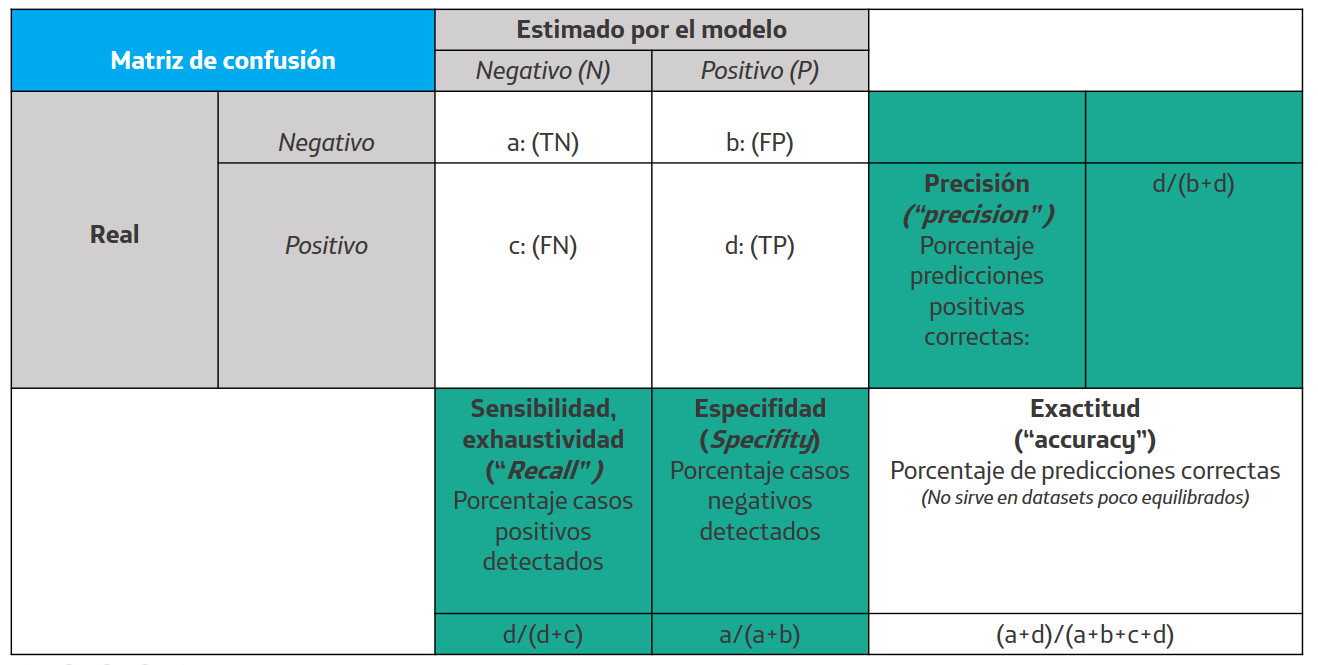

Creamos una función que nos permita resumir las principales métricas de los modelos y así poder comparar el performance de los algoritmos:

In [ ]:
# def nombre_funcion(param_1,param_2,...):
#     acciones que quieres que genere tu funcion sobre los parametros
#     accion1(param_1)

In [ ]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1542
           1       0.49      0.48      0.48       568

    accuracy                           0.72      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.72      0.72      0.72      2110

AUC ROC :  0.6472559416159734


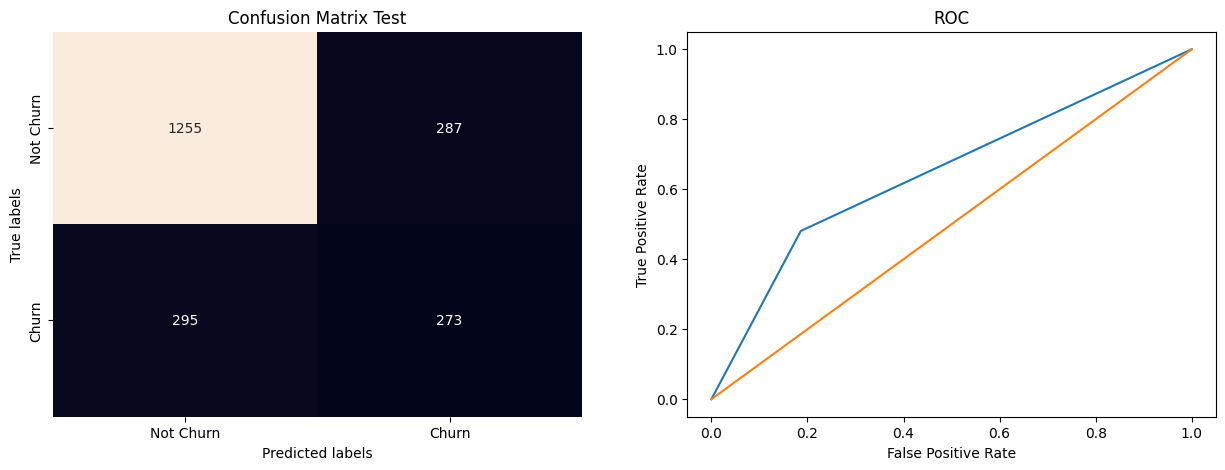

In [ ]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

In [ ]:
# 1255 : Del total de clientes que no fugaron (1255+2287 = 1552), mi modelo esta prediciendo de manera correcta a 1278
# 283 : Del total de clientes que fugaron (275+283 = 558), mi modelo predice de manera correcta a 283
# 275 : Del total de clientes que fugaron (275+283 = 558), mi modelo esta prediciendo de manera incorrecta a 275
# 274 : Del total de clientes que no fugaron (1278+274 = 1552), mi modelo no esta prediciendo bien a 274

In [ ]:
# INDICADOR GLOBAL : ACCURACY DEL TEST

# ACCURACY_TEST = (1278+283) / (1278+283+275+274)
# Del total de datos de entrenamiento

(1278+283) / (1278+283+275+274)

0.7398104265402844

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.66      0.52      0.58       558

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110

AUC ROC :  0.7117836160070945


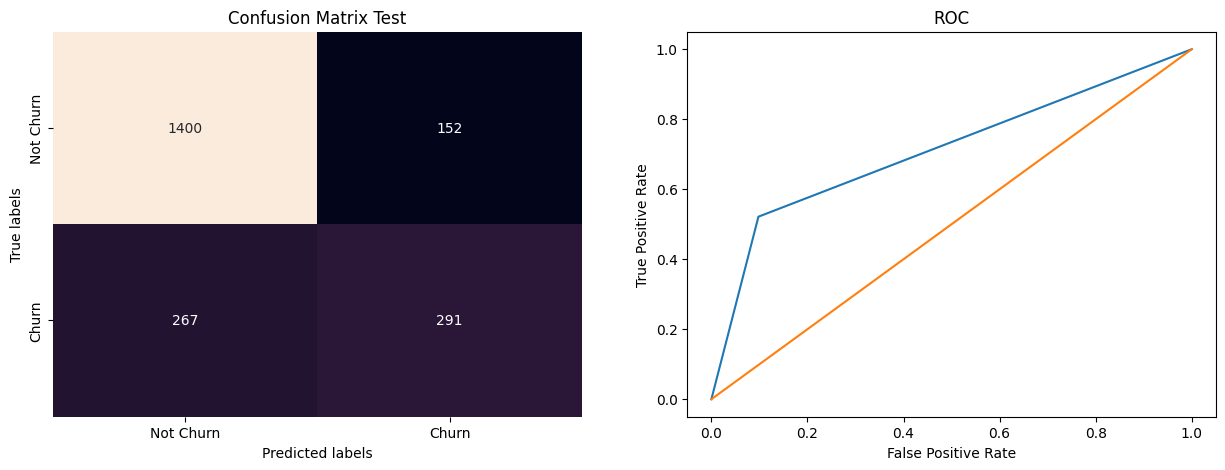

In [ ]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.62      0.48      0.54       558

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

AUC ROC :  0.6861605328308021


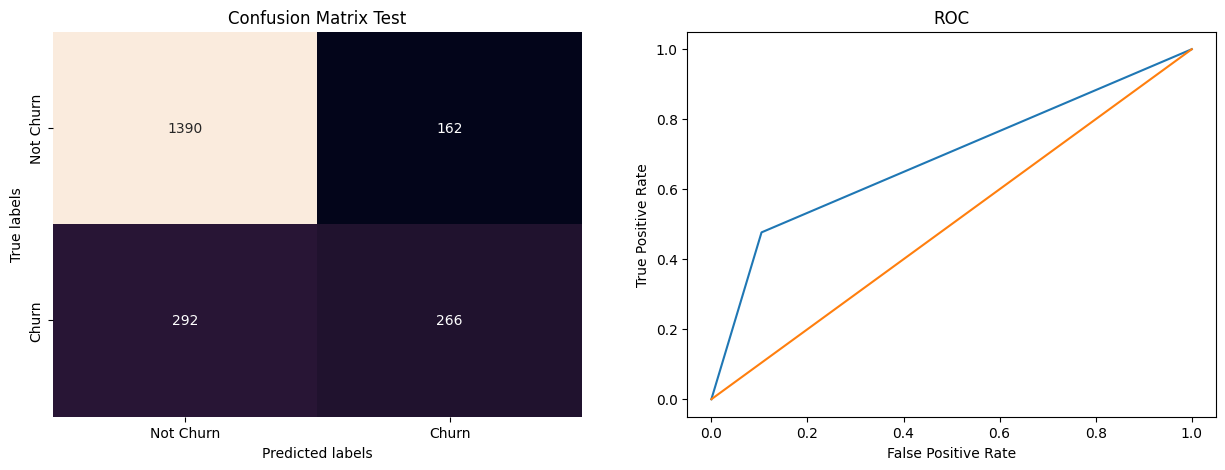

In [ ]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.61      0.52      0.56       558

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

AUC ROC :  0.7002561153604552


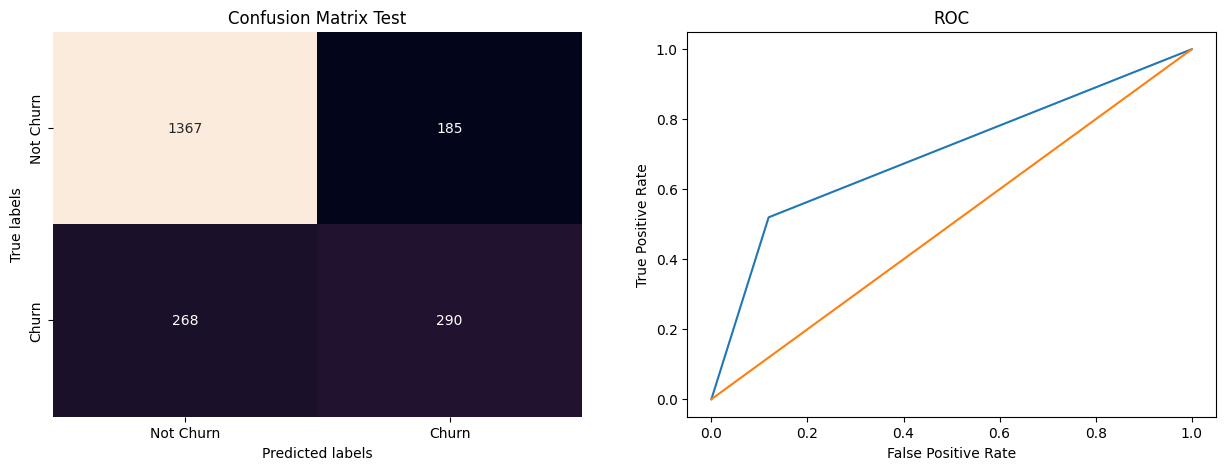

In [ ]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

Aparentemente la Regresión Logística y XgBoost me está entregando mejores resultados de predicción del Churn, esto sin realizar ningún ajuste a los modelos.

**Calibración de parámetros**



Si durante la evaluación no obtuvimos buenas predicciones y nuestra precisión no es la mínima deseada es posible que tengamos problemas de overfitting (ó underfitting) y deberemos retornar al paso de entrenamiento haciendo antes una nueva configuración de parámetros de nuestro modelo.

Podemos incrementar la cantidad de veces que iteramos nuestros datos de entrenamiento (EPOCHs). Otro parámetro importante es el conocido como «Learning Rate» (taza de aprendizaje) que suele ser un valor que multiplica al gradiente para acercarlo poco a poco al mínimo global (o local) para minimizar el coste de la función. No es lo mismo incrementar nuestros valores en 0,1 unidades que de 0,001 esto puede afectar significativamente el tiempo de ejecución del modelo.

También se puede indicar el máximo error permitido de nuestro modelo. Podemos pasar de tardar unos minutos a horas (y días) en entrenar nuestra máquina. A estos parámetros muchas veces se les llama Hiperparámetros.

Este «tuneo» sigue siendo más un arte que una ciencia y se ira mejorando a medida que experimentamos.

In [ ]:
# Tecnicas de Optimizacion de Hiperparametros :

# 1. Busqueda por cuadricula : Se le entrega al algoritmo una lista de hiperparametros y de diferentes valores con los cuales
# el algoritmo hara varios entrenamientos y te indicara con cual escenario tuvo un mejor performance.(Puede ser mas lento)

# 2. Busqueda aleatorizada : El modelo no va a probar con todas las combinaciones posibles, sino con una muestra de ellas,
# te indicara en cual escenario se obtuvo en mejor performance. (No prueba con todos los escenarios posibles)

# 3. Busqueda bayesiana : Crear un modelo probabilistico a partir de un conjunto de hiperparametros obteniendo un mejor performance.
# Utiliza analisis de regresion para elegir de forma iterativa el mejor conjunto de hiperparametros

In [ ]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}


RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30],
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_parameters = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4]

                     }

In [ ]:
from sklearn.model_selection import GridSearchCV # Gridsearch se basa en la tecnica de Busqueda por cuadricula

def grid_search(clf,parameters,xTrain,Ytrain):

    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc',cv = 5) #scoring sirve para indicarle que metrica va a usar para comparar sus iteraciones de modelos
    grid_fit = grid_obj.fit(xTrain,Ytrain) # Entreno
    best_clf = grid_fit.best_estimator_ # Entrega el mejor resultado obtenido en las iteraciones

    return best_clf

Volvemos a entrenar nuestra data con los mismos algoritmos, ahora con el calibramiento de los parámetros:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.49      0.56       558

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

AUC ROC :  0.7009905128773601


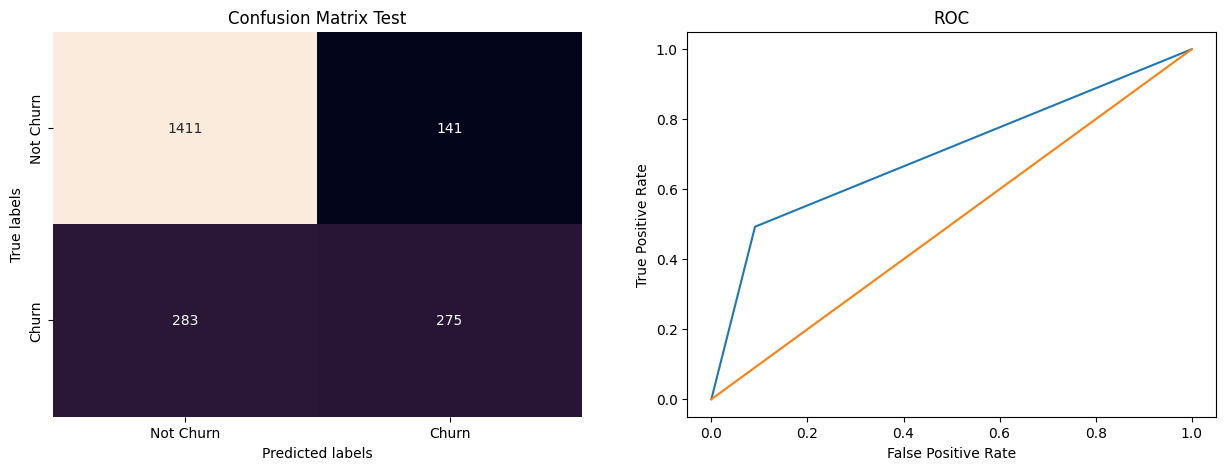

In [ ]:
tree_grid = grid_search(decision_tree,Tree_parameters,X_train,y_train)
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1552
           1       0.55      0.76      0.64       558

    accuracy                           0.77      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.81      0.77      0.78      2110

AUC ROC :  0.7660227986549902


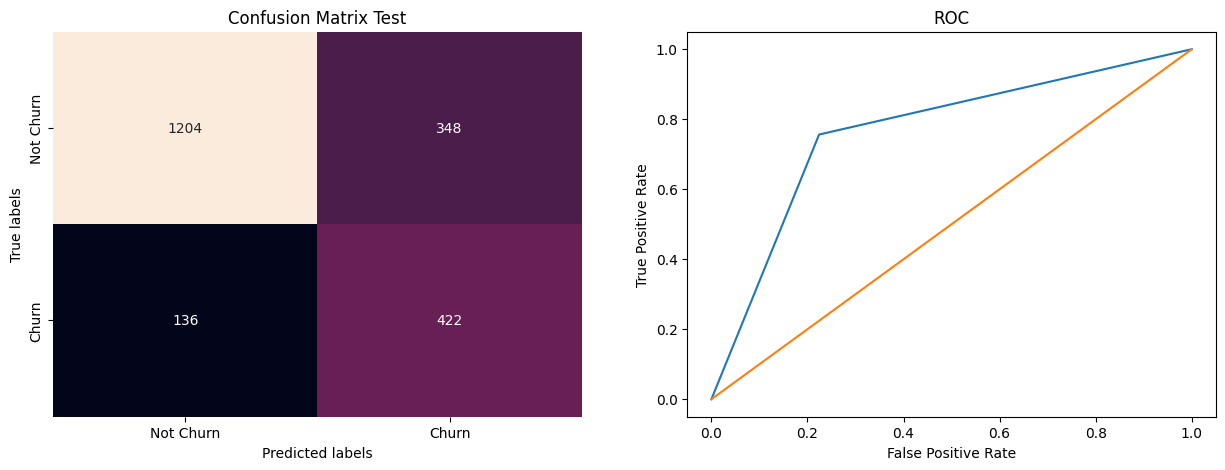

In [ ]:
randomForest_grid = grid_search(random_forest,RandomForest_parameters,X_train,y_train);
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)

[21:39:26] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[21:39:26] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[21:39:27] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[21:39:27] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[21:39:27] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[21:39:27] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[21:39:27] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[21:39:28] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[21:39:28] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[21:39:28] WARNING: ../src/learner.cc

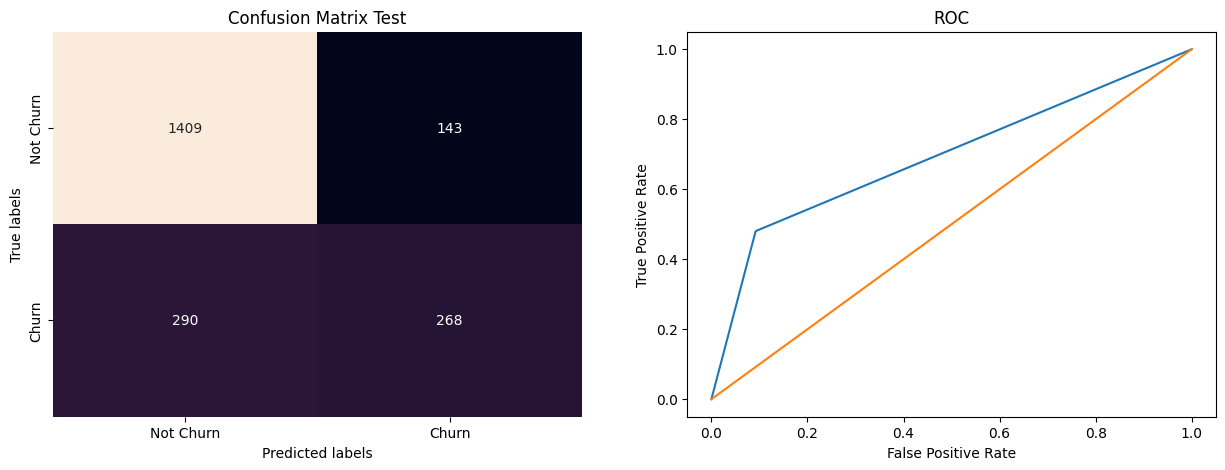

In [ ]:
xgBoost_grid = grid_search(xg_boost,Xgboost_parameters,X_train,y_train);
apply_classifier(xgBoost_grid,X_train, X_test, y_train, y_test)

Random Forest tiene un mejor nivel de ROC (75%) vemos claramente que nuestro nivel de ajuste del modelo mejoró respecto a la primera ejecución sin calibramiento de parámetros.

**Balanceo de las clases de variable a predecir (Churn)**

Como vimos en los análisis descriptivos el % de clientes churn representaba alrededor de un 25% de la data total, lo que nos indica que existe una diferencia de alrededor del 50% con la cantidad de clientes que seguían siendo parte de la empresa, en términos de predicción es recomendable trata de crear muestras de datos que equiparen los % de distribución de ambas clases.

Hay varios métodos de muestreo que han sido diseñados para tratar datos desbalanceados, los cuales pueden ser agrupados en cuatro categorías: submuestreo, sobremuestreo, generación de datos sintéticos y aprendizaje sensible al costo. Todos estos métodos modifican la proporción de las clases y el tamaño del dataset original.

Los métodos de submuestreo eliminan observaciones de la clase mayoritaria con el fin de igualar los tamaños de las clases.

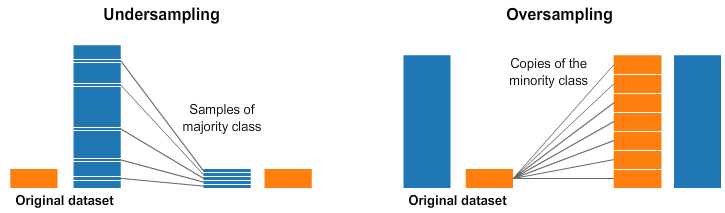

In [ ]:
from sklearn.utils import resample

upsample_data = data_original # Generar una copia de nuestra data original

majority = upsample_data[upsample_data["Churn"]==0] # Muestra categoria No churn
minority = upsample_data[upsample_data["Churn"]==1] # Muestra categoria Churn 27%



In [ ]:
majority.shape, minority.shape

((5163, 47), (1869, 47))

In [ ]:
minority_upsampled = resample(minority, replace=True, n_samples=5163,random_state=1) # Sobremuestreo

In [ ]:
minority_upsampled.shape

(5163, 47)

In [ ]:
del(upsample_data) # elimina
upsample_data = pd.concat([majority,minority_upsampled])

In [ ]:
upsample_data.shape

(10326, 47)

In [ ]:
upsample_data["Churn"].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
upsample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10326 entries, 0 to 4396
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           10326 non-null  float64
 1   TotalCharges                             10326 non-null  float64
 2   gender_Female                            10326 non-null  uint8  
 3   gender_Male                              10326 non-null  uint8  
 4   SeniorCitizen_0                          10326 non-null  uint8  
 5   SeniorCitizen_1                          10326 non-null  uint8  
 6   Partner_No                               10326 non-null  uint8  
 7   Partner_Yes                              10326 non-null  uint8  
 8   Dependents_No                            10326 non-null  uint8  
 9   Dependents_Yes                           10326 non-null  uint8  
 10  PhoneService_No                          10326 

In [ ]:
id_customer_upsample = upsample_data["customerID"]
label_upsample = upsample_data["Churn"]
upsample_data.drop("Churn",inplace = True, axis = 1)
upsample_data.drop("customerID",inplace = True, axis = 1)

Vuelvo a hacer una partición de mi nueva data en data de entrenamiento y de prueba (30%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)


Ahora ejecuto nuevamente todos mis algoritmos con la data balanceada:

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1571
           1       0.81      0.94      0.87      1527

    accuracy                           0.86      3098
   macro avg       0.87      0.86      0.86      3098
weighted avg       0.87      0.86      0.86      3098

AUC ROC :  0.8616092178262107


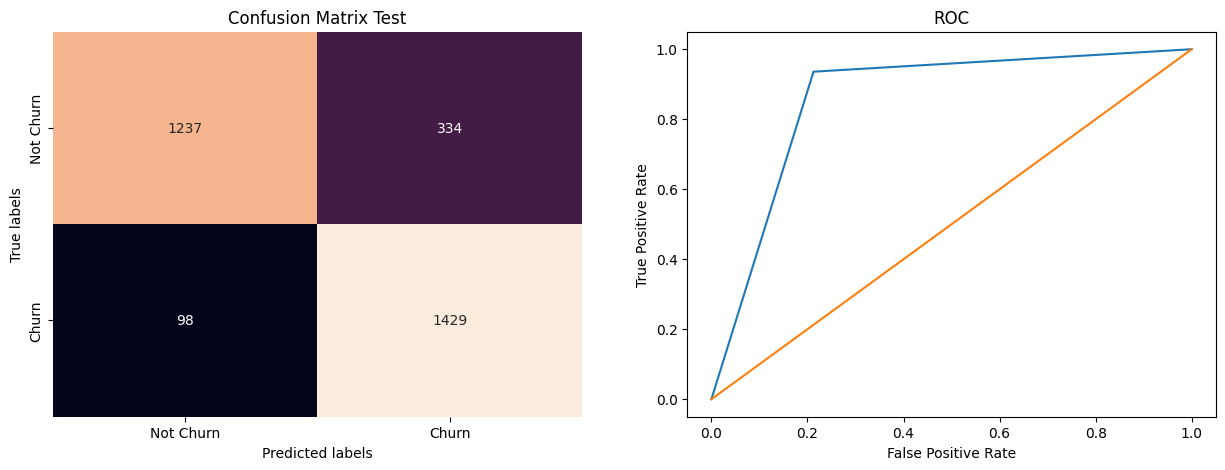

In [ ]:
decision_tree_ups = DecisionTreeClassifier()
apply_classifier(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1571
           1       0.74      0.78      0.76      1527

    accuracy                           0.75      3098
   macro avg       0.75      0.75      0.75      3098
weighted avg       0.75      0.75      0.75      3098

AUC ROC :  0.7540979950536014


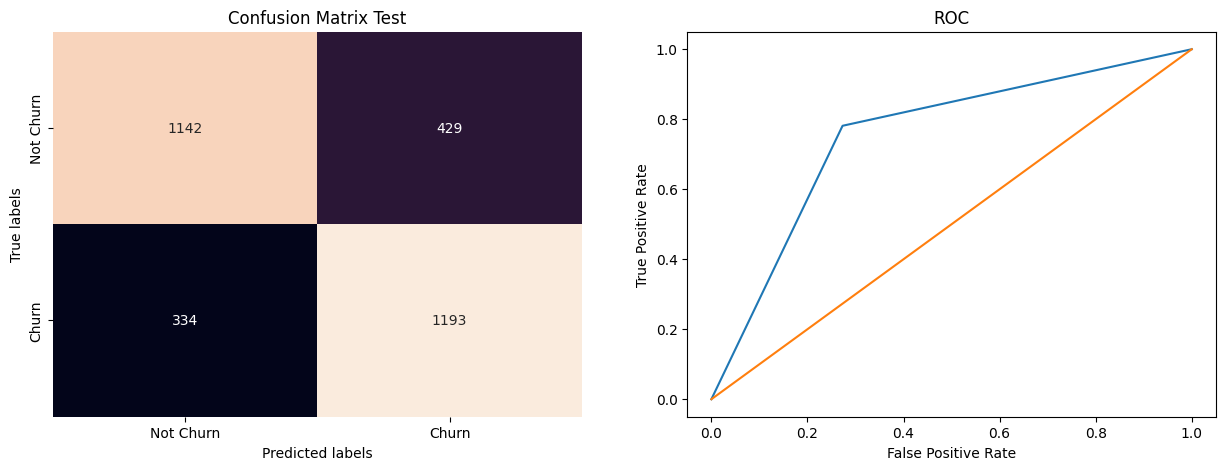

In [ ]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1571
           1       0.83      0.94      0.88      1527

    accuracy                           0.88      3098
   macro avg       0.88      0.88      0.88      3098
weighted avg       0.88      0.88      0.88      3098

AUC ROC :  0.8769044531344767


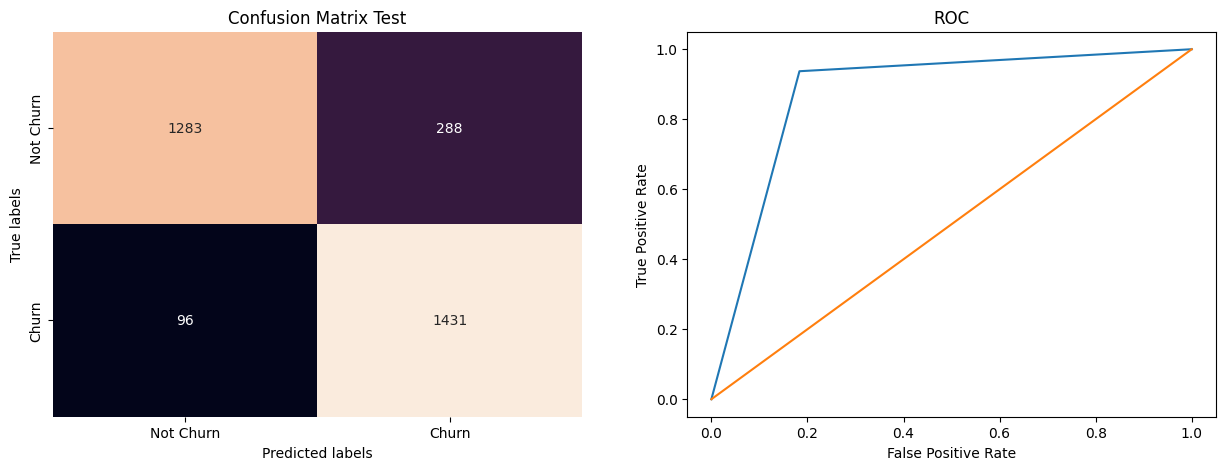

In [ ]:
random_forest = RandomForestClassifier()
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1571
           1       0.80      0.91      0.85      1527

    accuracy                           0.84      3098
   macro avg       0.85      0.85      0.84      3098
weighted avg       0.85      0.84      0.84      3098

AUC ROC :  0.8450473692920597


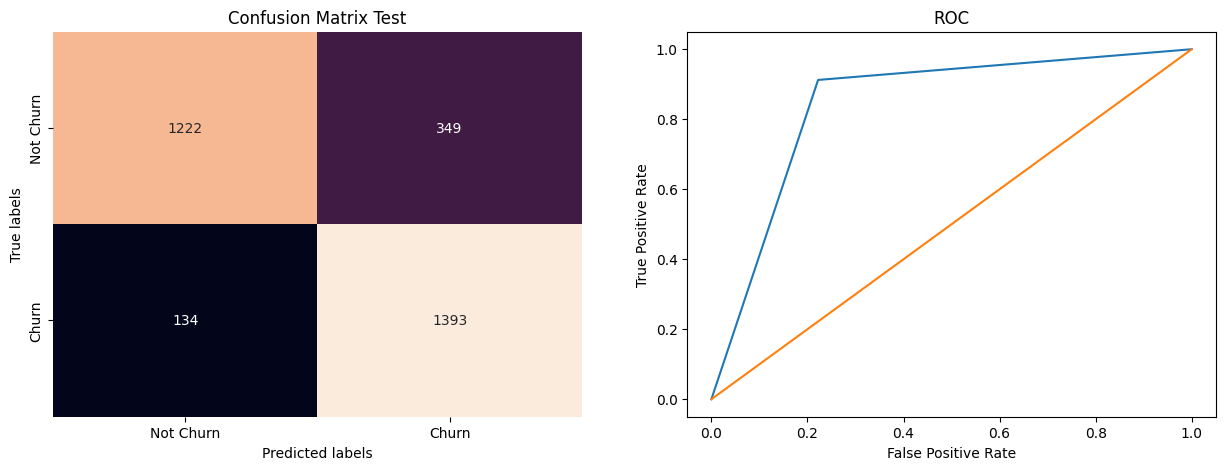

In [ ]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

Vemos que todos los algoritmos utilizados aumentaron considerablemente sus niveles de precisión con el balanceo de datos.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.Explainer(random_forest)
shap_values = explainer.shap_values(X_test_upS)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


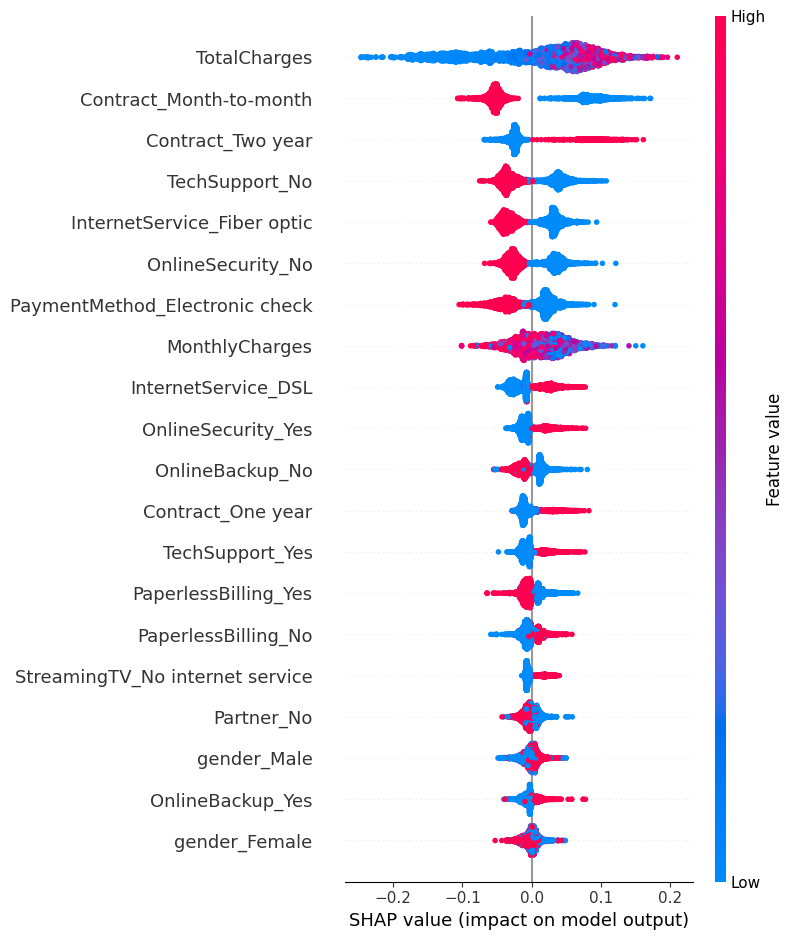

In [ ]:
shap.summary_plot(shap_values[0], X_test_upS)

In [ ]:
# Target : 1 (Valor de target alto) es cliente que fuga, 0 (Valor de target bajo) es cliente que no fuga

# Feature N° 1:

# Contract month to month : 1 (Valor de feature alto) es cliente que si tiene contrato mensual, 0 (Valor de feature bajo) cliente
#                           que no tiene contrato mensual

# Entonces un cliente que no tiene contrato mensual, es decir contrato anual (SHAP bajo) tiene una probabilidad alta de irse
# Cliente que tiene contrato mensual (SHAP alto) tiene una baja probabilidad de irse.


# Feature N° 2:

# Total Charges : Cliente con valor bajo de cargos totales (SHAP bajo) tiene una baja probabilidad de irse
#                 Cliente con valor alto de cargos totales (SHAP alto) tiene una alta probabilidad de irse